# Haberman Survival dataset

Haberman dataset: https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival
1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

OBJECTIVE: Classify a new case as belonging to one of the two classes given 3 features.

In [13]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
haber = pd.read_csv("haberman.csv")

In [2]:
# (Q) how many data-points and features?
print (haber.shape)

(306, 4)


In [3]:
#(Q) What are the column names in our dataset?
print (haber.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
#(Q) How many data points for each class are present? 
haber["status"].value_counts()
# balanced-dataset vs imbalanced datasets
#haber is a imbalanced dataset as the number of data points for one class is very large when compared to the other class.

1    225
2     81
Name: status, dtype: int64

# 2-D Scatter Plot

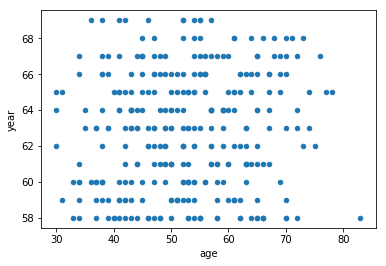

In [5]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haber.plot(kind='scatter', x='age', y='year') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/status.

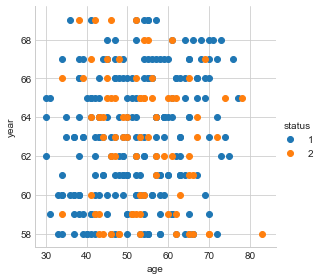

In [6]:
# 2-D Scatter plot with color-coding for each status/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style('whitegrid')
sns.FacetGrid(haber, hue = 'status', size = 4) \
    .map(plt.scatter, 'age', 'year') \
    .add_legend()
plt.show()

# Notice that the blue points cannot be easily separated from orange points.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 3C2 = 3.

**Observations:**
1. Using age and year, we cannot distinguish 1(survive more than 5 years) and 2(die within 5 years) as they have much overlap. 

# Pair-plot

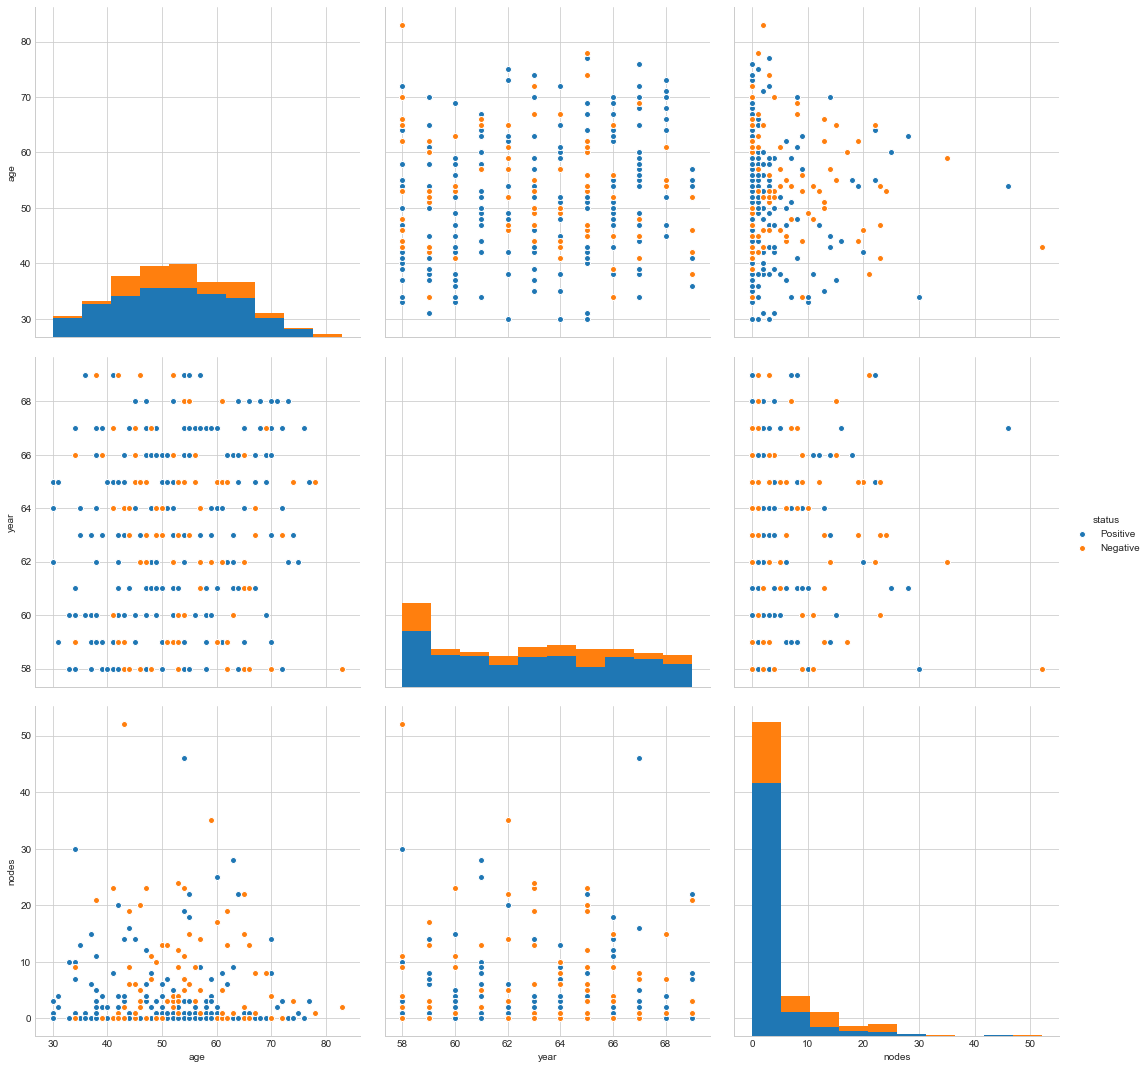

In [7]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
# Since the class label contains numerical types, we have to convert them to categorical types.
haber['status'] = haber['status'].apply(lambda x: 'Positive' if x == 1 else 'Negative')
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haber, hue = 'status', size = 5)
plt.show()
# NOTE: the diagnol elements are PDFs for each feature.

**Observations:**
1. There are are no useful features to identify status as all of them are having considerable overlap.
2. We cannot find "lines" and "if-else" conditions to build a simple model to classify the status.

# Univariate analysis using Histogram, PDF and CDF

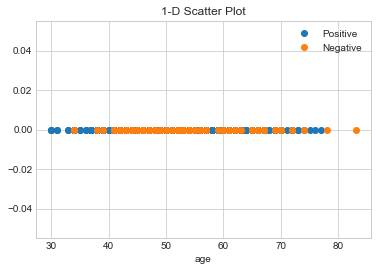

In [11]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of age
import numpy as np
positive = haber.loc[haber["status"] == "Positive"];
negative = haber.loc[haber["status"] == "Negative"];

plt.xlabel('age')
plt.title('1-D Scatter Plot')
label = ['Positive', 'Negative']
plt.plot(positive["age"], np.zeros_like(positive['age']), 'o')
plt.plot(negative["age"], np.zeros_like(negative['age']), 'o')
plt.legend(label)

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.


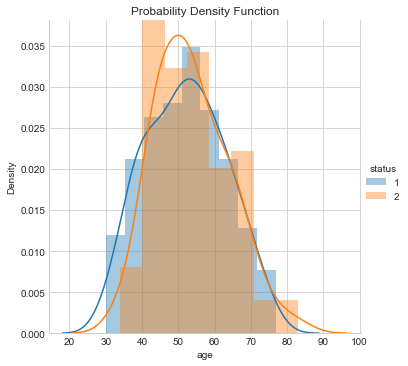

In [14]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.show()

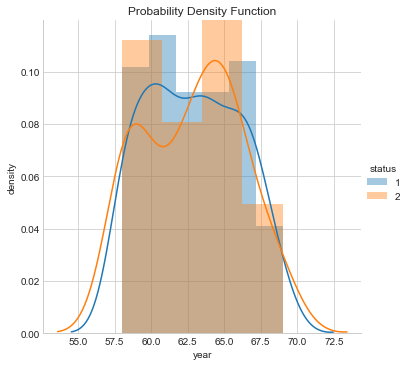

In [15]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.ylabel('density')
plt.title('Probability Density Function')
plt.show()

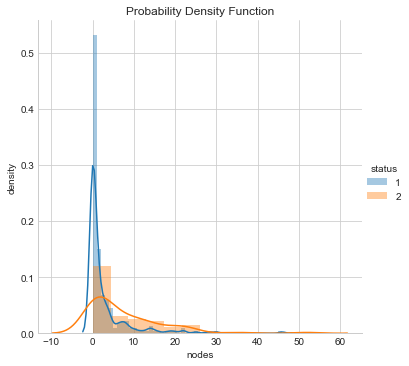

In [16]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.ylabel('density')
plt.title('Probability Density Function')
plt.show()

**Observation:**
1. By seeing the above plots, feature 'nodes' is somewhat better than the other two features as it has less overlap compared to the remaining.
2. When the nodes are from 0 to 5, there are more positive cases. 

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


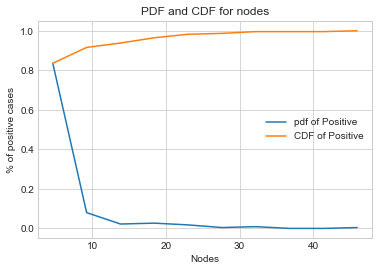

In [19]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of positive cases(with status 1) have a 
# nodes of less than 10?


#Plot CDF of nodes

counts, bin_edges = np.histogram(positive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
label = ['pdf of Positive', 'CDF of Positive']
plt.xlabel('Nodes')
plt.ylabel('% of positive cases')
plt.title('PDF and CDF for nodes')
plt.legend(label)



plt.show();

**Observations:**
1. We can see that approximately 90% of positive cases have nodes of less than 10.
2. Also we can see that approximately 80% of positive cases have nodes of less than 5.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


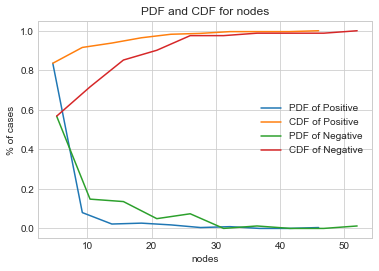

In [20]:
# Plots of CDF of nodes for both positive and negative cases.


counts, bin_edges = np.histogram(positive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(negative['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
label = ['PDF of Positive', 'CDF of Positive', 'PDF of Negative', 'CDF of Negative']
plt.xlabel('nodes')
plt.ylabel('% of cases')
plt.title('PDF and CDF for nodes')
plt.legend(label)
plt.show()


**Observations:**
1. If nodes are greater than 45, we can see that there are around 100% of negative cases.

# Box-plots and Whiskers 

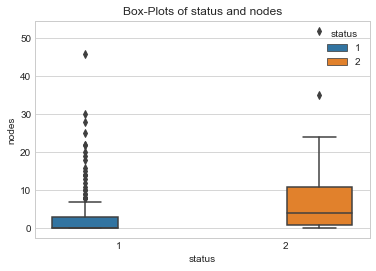

In [26]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.



#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x = 'status', y = 'nodes', hue = 'status', data=haber)
plt.title('Box-Plots of status and nodes')

plt.show()

**Observation:**
1. If nodes are greater than 11, there is less chance of survival.

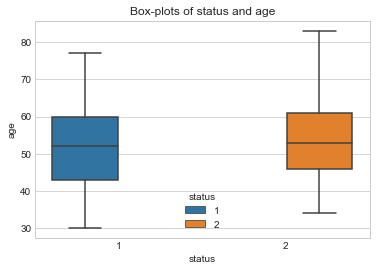

In [27]:
sns.boxplot(x='status',y='age', hue = 'status', data=haber).set_title('Box-plots of status and age')
plt.show()

**Observation:**
1. People with age greater than 62 has less chance of survival.

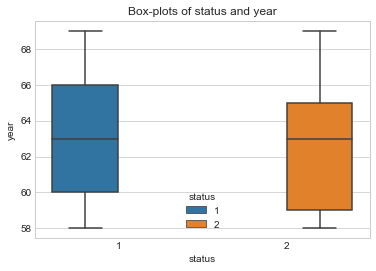

In [28]:
sns.boxplot(x='status',y='year', hue = 'status', data=haber).set_title('Box-plots of status and year')
plt.show()

**Observation:**
1. People treated after the year 1966 has higher chance of survival.

# Violin Plots

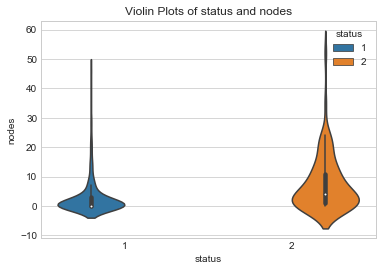

In [30]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="nodes", hue = 'status', data=haber, size=8).set_title('Violin Plots of status and nodes')
plt.show()

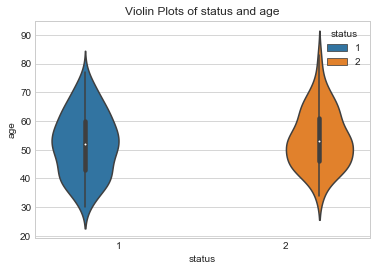

In [31]:
sns.violinplot(x="status", y="age", hue = 'status', data=haber, size=8).set_title('Violin Plots of status and age')
plt.show()

**Observation:**
1. The same observations of box-plots will be followed for violin-plots as well.